In [1]:
import uproot

In [2]:
import sys
import os

path = os.path.abspath(".")
sys.path.insert(0, os.path.dirname(path))
sys.path

['/gwpool/users/gpizzati/test_processor/my_processor',
 '/gwpool/users/gpizzati/test_processor/my_processor/notebooks',
 '/gwpool/users/gpizzati/mambaforge/envs/test_uproot/lib/python310.zip',
 '/gwpool/users/gpizzati/mambaforge/envs/test_uproot/lib/python3.10',
 '/gwpool/users/gpizzati/mambaforge/envs/test_uproot/lib/python3.10/lib-dynload',
 '',
 '/gwpool/users/gpizzati/mambaforge/envs/test_uproot/lib/python3.10/site-packages']

In [3]:
from framework import read_events, read_chunks

In [4]:
chunks = read_chunks("../condor/job_0/chunks_job.pkl")

In [5]:
events = read_events(
    **{k: v for k, v in chunks[1].items() if k != "dataset" and k != "xs"}
)

start reading
created events


In [6]:
import awkward as ak
import numpy as np

In [7]:
ak.fields(events)

['Jet',
 'GenPart',
 'GenJet',
 'Electron',
 'Muon',
 'fixedGridRhoFastjetAll',
 'HLT',
 'Flag',
 'genWeight',
 'LHEScaleWeight',
 'LHEPdfWeight',
 'Pileup',
 'run',
 'luminosityBlock']

In [8]:
ak.fields(events.Jet)

['pt',
 'eta',
 'phi',
 'mass',
 'jetId',
 'puId',
 'genJetIdx',
 'rawFactor',
 'area',
 'btagDeepFlavB',
 'hadronFlavour']

In [10]:
columns = []
for column_base in ak.fields(events):
    column_suffixes = ak.fields(events[column_base])
    if len(column_suffixes) == 0:
        columns.append((column_base,))
    else:
        for column_suffix in column_suffixes:
            columns.append((column_base, column_suffix))
columns

[('Jet', 'pt'),
 ('Jet', 'eta'),
 ('Jet', 'phi'),
 ('Jet', 'mass'),
 ('Jet', 'jetId'),
 ('Jet', 'puId'),
 ('Jet', 'genJetIdx'),
 ('Jet', 'rawFactor'),
 ('Jet', 'area'),
 ('Jet', 'btagDeepFlavB'),
 ('Jet', 'hadronFlavour'),
 ('GenPart', 'pt'),
 ('GenPart', 'eta'),
 ('GenPart', 'phi'),
 ('GenPart', 'mass'),
 ('GenPart', 'pdgId'),
 ('GenPart', 'status'),
 ('GenPart', 'genPartIdxMother'),
 ('GenPart', 'statusFlags'),
 ('GenJet', 'pt'),
 ('GenJet', 'eta'),
 ('GenJet', 'phi'),
 ('GenJet', 'mass'),
 ('Electron', 'pt'),
 ('Electron', 'eta'),
 ('Electron', 'phi'),
 ('Electron', 'pdgId'),
 ('Electron', 'mvaFall17V2Iso_WP90'),
 ('Electron', 'convVeto'),
 ('Electron', 'pfRelIso03_all'),
 ('Electron', 'cutBased'),
 ('Electron', 'sieie'),
 ('Electron', 'eInvMinusPInv'),
 ('Electron', 'dxy'),
 ('Electron', 'dz'),
 ('Muon', 'pt'),
 ('Muon', 'eta'),
 ('Muon', 'phi'),
 ('Muon', 'pdgId'),
 ('Muon', 'tightId'),
 ('Muon', 'pfRelIso04_all'),
 ('Muon', 'dxy'),
 ('Muon', 'dz'),
 ('Muon', 'genPartIdx'),
 ('Muo

In [11]:
events[('luminosityBlock',)]

<Array [6416, 6416, 6416, 6416, ..., 2078, 2078, 2078] type='100000 * uint32'>

In [12]:
def get_columns(events):
    columns = []
    for column_base in ak.fields(events):
        column_suffixes = ak.fields(events[column_base])
        if len(column_suffixes) == 0:
            columns.append((column_base,))
        else:
            for column_suffix in column_suffixes:
                columns.append((column_base, column_suffix))
    return columns

In [13]:
get_columns(events)

[('Jet', 'pt'),
 ('Jet', 'eta'),
 ('Jet', 'phi'),
 ('Jet', 'mass'),
 ('Jet', 'jetId'),
 ('Jet', 'puId'),
 ('Jet', 'genJetIdx'),
 ('Jet', 'rawFactor'),
 ('Jet', 'area'),
 ('Jet', 'btagDeepFlavB'),
 ('Jet', 'hadronFlavour'),
 ('GenPart', 'pt'),
 ('GenPart', 'eta'),
 ('GenPart', 'phi'),
 ('GenPart', 'mass'),
 ('GenPart', 'pdgId'),
 ('GenPart', 'status'),
 ('GenPart', 'genPartIdxMother'),
 ('GenPart', 'statusFlags'),
 ('GenJet', 'pt'),
 ('GenJet', 'eta'),
 ('GenJet', 'phi'),
 ('GenJet', 'mass'),
 ('Electron', 'pt'),
 ('Electron', 'eta'),
 ('Electron', 'phi'),
 ('Electron', 'pdgId'),
 ('Electron', 'mvaFall17V2Iso_WP90'),
 ('Electron', 'convVeto'),
 ('Electron', 'pfRelIso03_all'),
 ('Electron', 'cutBased'),
 ('Electron', 'sieie'),
 ('Electron', 'eInvMinusPInv'),
 ('Electron', 'dxy'),
 ('Electron', 'dz'),
 ('Muon', 'pt'),
 ('Muon', 'eta'),
 ('Muon', 'phi'),
 ('Muon', 'pdgId'),
 ('Muon', 'tightId'),
 ('Muon', 'pfRelIso04_all'),
 ('Muon', 'dxy'),
 ('Muon', 'dz'),
 ('Muon', 'genPartIdx'),
 ('Muo

In [14]:
part1.root'

In [15]:
f = uproot.open(fname)

In [99]:
fname_base = '/eos/cms/store/group/phys_higgs/cmshww/amassiro/HWWNano/Summer20UL18_106x_nAODv9_Full2018v9/MCl1loose2018v9__MCCorr2018v9NoJERInHorn__l2tightOR2018v9/nanoLatino_DYJetsToLL_M-50__'
fname_list = [fname_base + f'part{i}.root' for i in range(1,3)]

In [100]:
def branch(name):
    arr = 0
    for fname in fname_list:
        f = uproot.open(fname)
        _arr = f['Events'][name].array()
        if isinstance(arr, int):
            arr = _arr
        else:
            arr = ak.concatenate([arr, _arr], axis=0)
        f.close()

    return arr

In [117]:
len(genWeight)

13396

In [101]:
genWeight = branch('XSWeight')

In [102]:
recoSF = branch('Lepton_RecoSF')
trig_SF = branch('TriggerSFWeight_2l')

In [103]:
id_iso_SF = branch('LepSF2l__ele_mvaFall17V2Iso_WP90__mu_cut_Tight_HWWW')

In [104]:
lep_pt = branch('Lepton_pt')

In [24]:
import hist

In [105]:
h = hist.Hist(
    hist.axis.Regular(30, 15, 100, name='pt'),
    hist.axis.StrCategory(['no_corr', 'reco_sf', 'id_iso_sf', 'trig_sf', 'all_corr'], name='corr'),
    hist.storage.Weight()
)

In [106]:
base_weight = genWeight
weights = {
    'no_corr': base_weight,
    'reco_sf': base_weight * recoSF[:, 0]*recoSF[:, 1],
    'id_iso_sf': base_weight * id_iso_SF,
    'trig_sf': base_weight * trig_SF,
    'all_corr': base_weight * recoSF[:, 0]*recoSF[:, 1]*trig_SF * id_iso_SF,
}

In [107]:
for t in weights:
    h.fill(lep_pt[:, 0], corr=t, weight=weights[t])

In [108]:
h

Hist(
  Regular(30, 15, 100, name='pt'),
  StrCategory(['no_corr', 'reco_sf', 'id_iso_sf', 'trig_sf', 'all_corr'], name='corr'),
  storage=Weight()) # Sum: WeightedSum(value=2131.86, variance=149.875) (WeightedSum(value=2177.32, variance=155.165) with flow)

In [109]:
import matplotlib.pyplot as plt

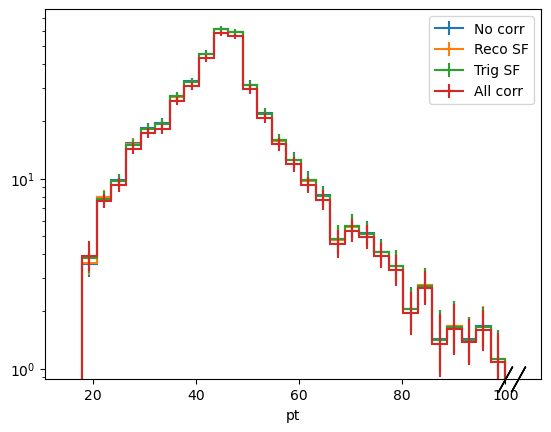

In [110]:
h[:, hist.loc('no_corr')].plot(label='No corr')
h[:, hist.loc('reco_sf')].plot(label='Reco SF')
h[:, hist.loc('trig_sf')].plot(label='Trig SF')
h[:, hist.loc('all_corr')].plot(label='All corr')
plt.yscale('log')
plt.legend()

In [111]:
values = []
for t in weights:
    values.append(h[:, hist.loc(t)].values())

In [112]:
x = h.axes[0].centers
edges = h.axes[0].edges

In [113]:
stat = np.sqrt(h[:, hist.loc('no_corr')].variances())

In [114]:
up = (values[0] + stat)/values[0]
do = (values[0] - stat)/values[0]

/tmp/gpizzati/ipykernel_2076540/23220345.py:1: RuntimeWarning: invalid value encountered in divide
  up = (values[0] + stat)/values[0]
/tmp/gpizzati/ipykernel_2076540/23220345.py:2: RuntimeWarning: invalid value encountered in divide
  do = (values[0] - stat)/values[0]


/tmp/gpizzati/ipykernel_2076540/1415723985.py:4: RuntimeWarning: invalid value encountered in divide
  plt.errorbar(x, values[0]/values[i], label=t)


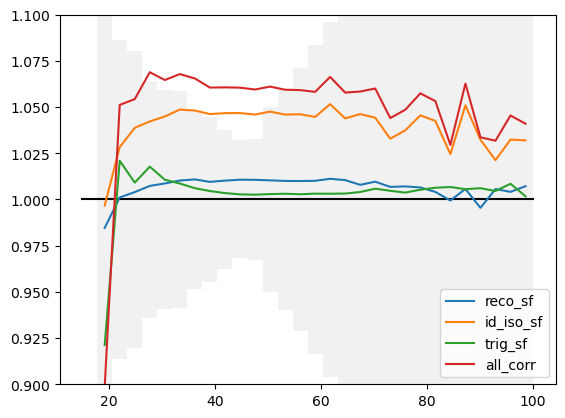

In [115]:
for i, t in enumerate(weights):
    if i == 0:
        continue
    plt.errorbar(x, values[0]/values[i], label=t)
plt.plot(edges, np.ones_like(edges), color='black')
plt.ylim(1-0.1, 1+0.1)
plt.legend()
plt.stairs(up, edges, baseline=do, fill=True, color='lightgrey', alpha=.3, zorder=-10)

In [116]:
len(genWeight)

13396